Project Overview

This project analyzes social media metrics to identify influencers with the highest subscribers, views, and likes. By collecting and analyzing data, we aim to rank potential collaboration partners, providing insights and recommendations for effective outreach strategies to enhance marketing efforts.

In [1]:
# IMPORTING REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dhariya\AppData\Local\Temp\ipykernel_8860\2168641884.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
d:\python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# IMPORTING THE FILE IN FORM OF DATAFRAME
social_df = pd.read_csv('SocialMediaTop1000.csv')
social_df.head()

,S.no,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
0,1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
1,2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
2,3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
3,4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
4,5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K


In [3]:
# INSPECTING THE IMPORTED DATA
social_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   S.no           1000 non-null   int64 
 1   Tiktoker name  1000 non-null   object
 2   Tiktok name    999 non-null    object
 3   Subscribers    1000 non-null   object
 4   Views avg.     1000 non-null   object
 5   Likes avg.     1000 non-null   object
 6   Comments avg.  1000 non-null   object
 7   Shares avg.    1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [4]:
# CHECKING FOR THE TOTAL NUMBER OF NULL VALUES.
social_df.isnull().sum()

S.no             0
Tiktoker name    0
Tiktok name      1
Subscribers      0
Views avg.       0
Likes avg.       0
Comments avg.    0
Shares avg.      0
dtype: int64

Since the dataset includes a column labeled 'S.no,' we can reset the index using this column.

In [5]:
# RESETING THE INDEX USING 'S.no' COLUMN.
social_df.set_index('S.no', inplace=True)

In [6]:
# DISPLAYING
social_df.head()

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
S.no,,,,,,,
1,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K
2,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K
3,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K
4,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K
5,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K


As we can see, the columns contain values such as 13.8M (million) and 90.5K (thousand). We will define a function to convert these values into a numeric format for better implementation.

In [7]:
# DEFINING A FUNCTION FOR CONVERSION.
def convert_to_numeric(value):
    value_str = str(value)  # Convert to string
    if 'M' in value_str:
#removes the 'M' from the string, trims any whitespace, converts it to a float, and multiplies by 1,000,000 to return the value in numeric format
        return float(value_str.replace('M', '').strip()) * 1_000_000 
    elif 'K' in value_str:
#removes the 'K' from the string, trims any whitespace, converts it to a float, and multiplies by 1,000 to return the value in numeric format        
        return float(value_str.replace('K', '').strip()) * 1_000
    else:
        return float(value_str)

In [8]:
# APPLYING THE 'convert_to_numeric' TO COLUMNS FOR CONVERSION.
social_df['Subscribers'] = social_df['Subscribers'].apply(convert_to_numeric)
social_df['Views avg.'] = social_df['Views avg.'].apply(convert_to_numeric)
social_df['Likes avg.'] = social_df['Likes avg.'].apply(convert_to_numeric)
social_df['Comments avg.'] = social_df['Comments avg.'].apply(convert_to_numeric)
social_df['Shares avg.'] = social_df['Shares avg.'].apply(convert_to_numeric)

In [9]:
# DISPLAYING
social_df.head()

,Tiktoker name,Tiktok name,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
S.no,,,,,,,
1,jypestraykids,Stray Kids,13800000.0,6400000.0,2300000.0,50200.0,34200.0
2,khaby.lame,Khabane lame,149200000.0,17300000.0,2300000.0,15200.0,8700.0
3,scarlettsspam2,scarlett,2100000.0,17900000.0,845800.0,53900.0,6300.0
4,addisonre,Addison Rae,88700000.0,22000000.0,906600.0,7600.0,26200.0
5,belindatok,Belinda,4800000.0,14200000.0,1500000.0,14500.0,15300.0


In [10]:
# INSPECTING DESCREPTIVE AND STATISTICAL ANALYSIS OF NUMERIC COLUMNS.
social_df.describe()

,Subscribers,Views avg.,Likes avg.,Comments avg.,Shares avg.
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,7.083611e+06,2.854531e+06,3.524345e+05,2540.129000,3263.483000
std,1.160618e+07,2.216005e+06,2.861912e+05,3691.868047,4778.561596
min,5.100000e+03,5.038000e+05,1.760000e+04,0.000000,70.000000
25%,1.300000e+06,1.600000e+06,1.899000e+05,985.000000,822.500000
50%,3.500000e+06,2.200000e+06,2.747000e+05,1600.000000,1800.000000
75%,8.100000e+06,3.325000e+06,4.007250e+05,2700.000000,3725.000000
max,1.492000e+08,2.200000e+07,2.700000e+06,53900.000000,55900.000000


C:\Users\dhariya\AppData\Local\Temp\ipykernel_8860\1215362657.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tiktoker_name,y=subscribers, data=highest_subscribers, palette=colors)


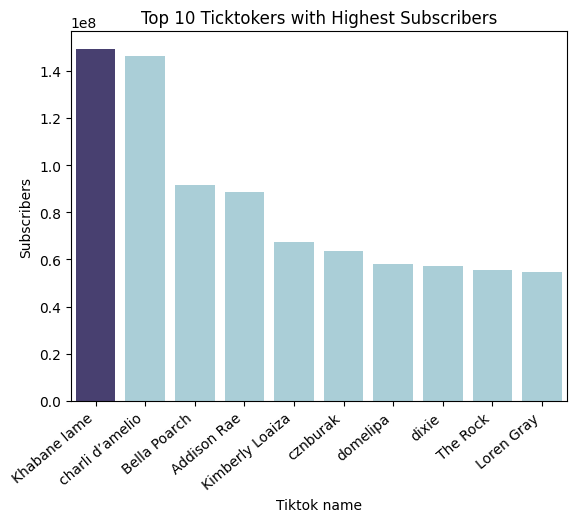

In [11]:
# PLOTTING A BAR GRAPH FOR TOP 10 INFLUENCERS BASED ON NUMBER OF SUBSCRIBERS.
highest_subscribers = social_df.sort_values(by='Subscribers', ascending=False).head(10)
tiktoker_name = highest_subscribers['Tiktok name']
subscribers = highest_subscribers['Subscribers']

colors = ['#433878', '#6A9AB0', '#6A9AB0', '#433878', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0']
ax = sns.barplot(x=tiktoker_name,y=subscribers, data=highest_subscribers, palette=colors)
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Ticktokers with Highest Subscribers')
plt.show()

C:\Users\dhariya\AppData\Local\Temp\ipykernel_8860\1018482784.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tiktoker_name,y=views, data=highest_subscribers, palette=colors)


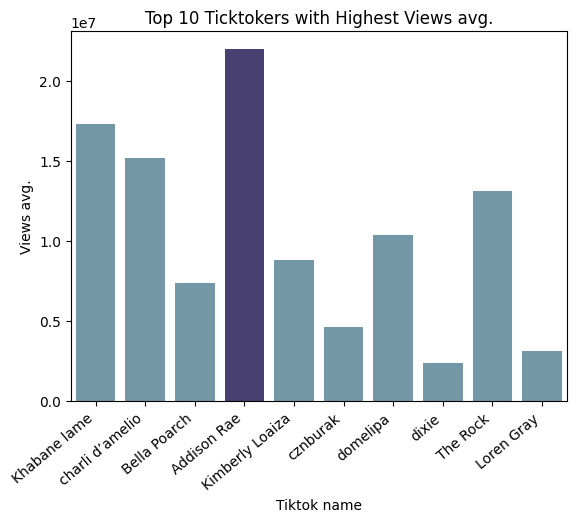

In [12]:
# PLOTTING A BAR GRAPH FOR TOP 10 INFLUENCERS BASED ON AVERAGE NUMBER OF VIEWS.
highest_views = social_df.sort_values(by='Views avg.', ascending=False).head(10)
tiktoker_name = highest_subscribers['Tiktok name']
views = highest_subscribers['Views avg.']

colors = ['#6A9AB0', '#6A9AB0', '#6A9AB0', '#433878', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0']
ax = sns.barplot(x=tiktoker_name,y=views, data=highest_subscribers, palette=colors)
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Ticktokers with Highest Views avg.')
plt.show()

C:\Users\dhariya\AppData\Local\Temp\ipykernel_8860\3050931593.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tiktoker_name, y=likes, data=highest_subscribers, palette=colors)


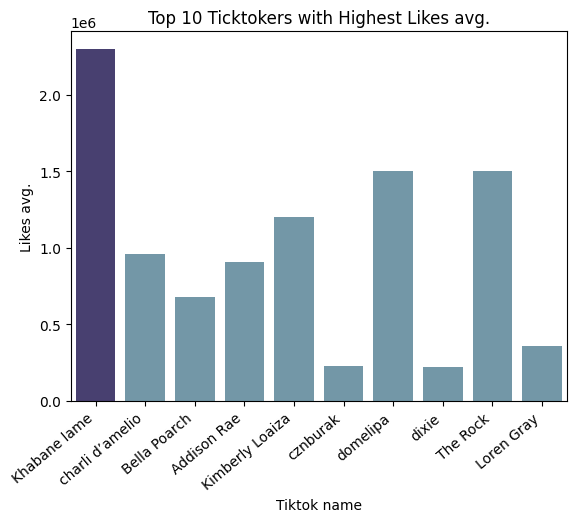

In [13]:
# PLOTTING A BAR GRAPH FOR TOP 10 INFLUENCERS BASED ON AVERAGE NUMBER OF LIKES.
highest_likes = social_df.sort_values(by='Likes avg.', ascending=False).head(10)
tiktoker_name = highest_subscribers['Tiktok name']
likes = highest_subscribers['Likes avg.']

colors = ['#433878', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0', '#6A9AB0']
ax = sns.barplot(x=tiktoker_name, y=likes, data=highest_subscribers, palette=colors)
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Ticktokers with Highest Likes avg.')
plt.show()

C:\Users\dhariya\AppData\Local\Temp\ipykernel_8860\2252225358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tiktoker_name,y=shares, data=highest_subscribers, palette=colors)


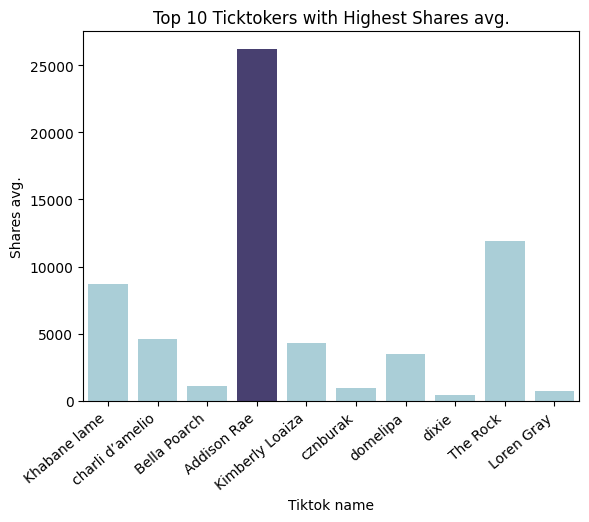

In [14]:
# PLOTTING A BAR GRAPH FOR TOP 10 INFLUENCERS BASED ON AVERAGE NUMBER OF SHARES.
highest_shares = social_df.sort_values(by='Shares avg.', ascending=False).head(10)
tiktoker_name = highest_subscribers['Tiktok name']
shares = highest_subscribers['Shares avg.']

colors = ['#A2D2DF', '#A2D2DF', '#A2D2DF', '#433878', '#A2D2DF', '#A2D2DF', '#A2D2DF', '#A2D2DF', '#A2D2DF', '#A2D2DF']
ax = sns.barplot(x=tiktoker_name,y=shares, data=highest_subscribers, palette=colors)
plt.xticks(rotation=40, ha='right')
plt.title('Top 10 Ticktokers with Highest Shares avg.')
plt.show()

From the above plotted bar graphs we can conclude that tiktoker: **Addison Rae** has highest number of views and share.


Tiktoker **Khabane lame** has highest subscibers and likes.


We can reach out to either of them for collaboration or marketing purposes.